<a href="https://colab.research.google.com/github/Daria-G26/Daria-G26/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(url, sep="\t")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [9]:

means = df.mean()
variances = df.var()
print("Mean values:\n", means)
print("\nVariance values:\n", variances)

Mean values:
 AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Variance values:
 AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

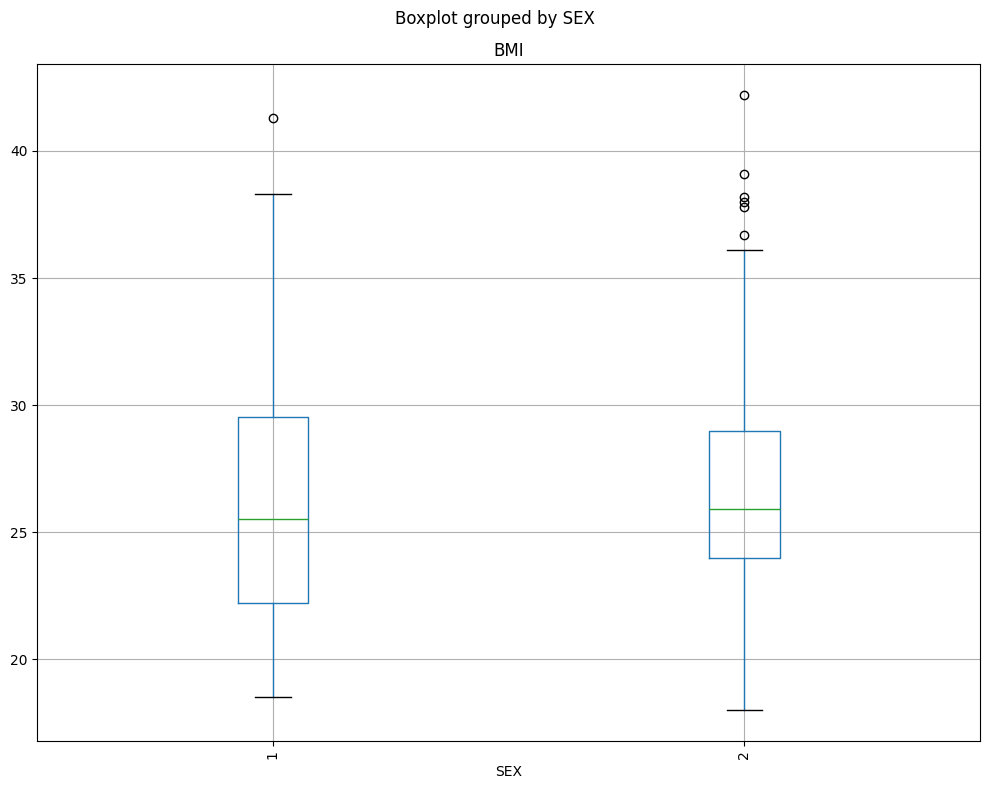

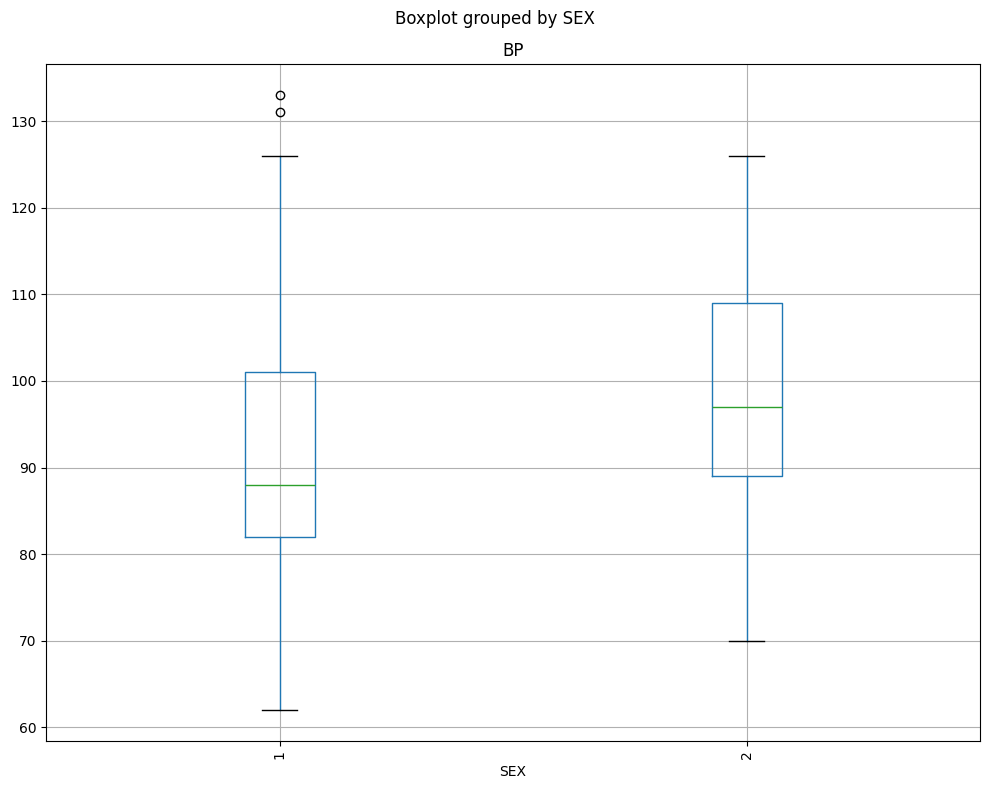

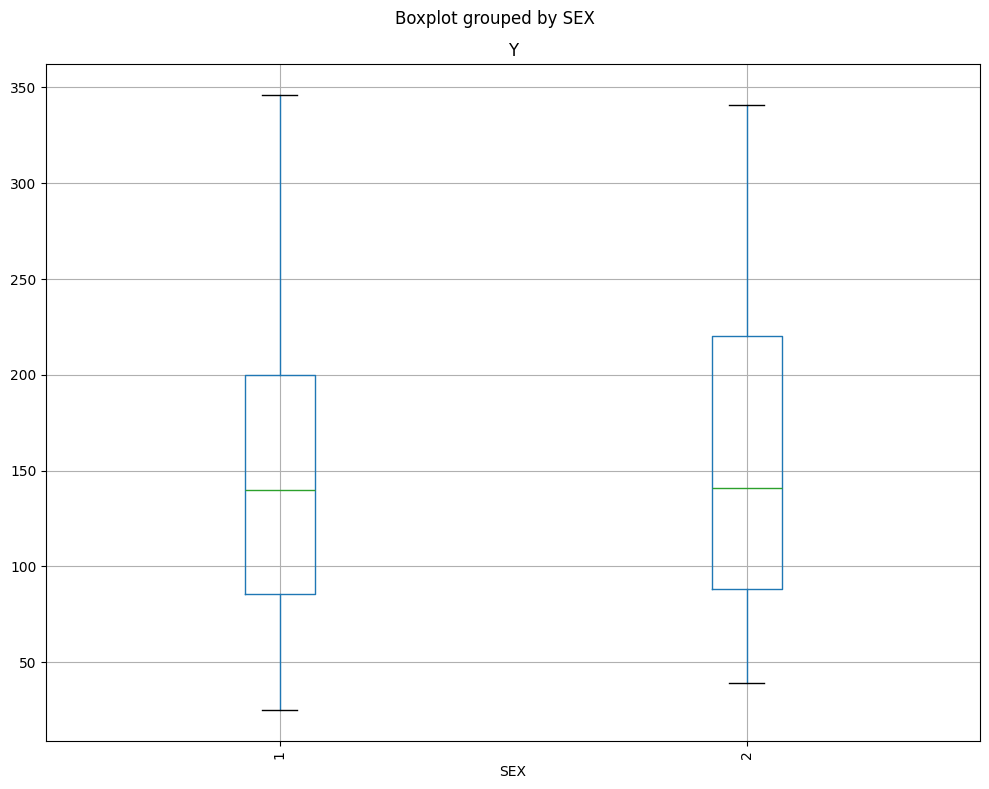

In [10]:
df.boxplot(column='BMI', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

df.boxplot(column='BP', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

df.boxplot(column='Y', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

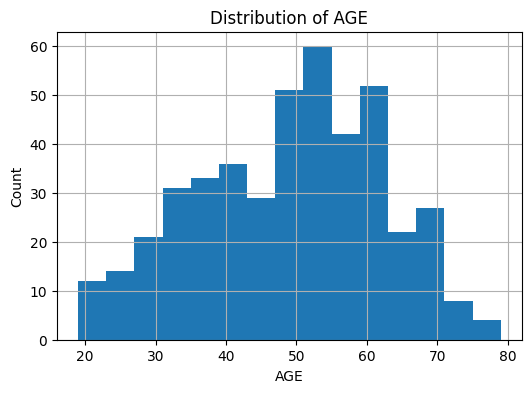

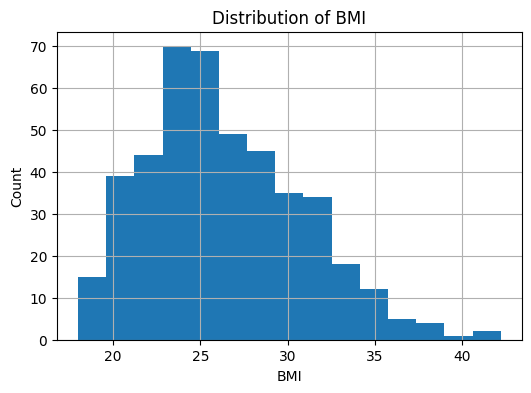

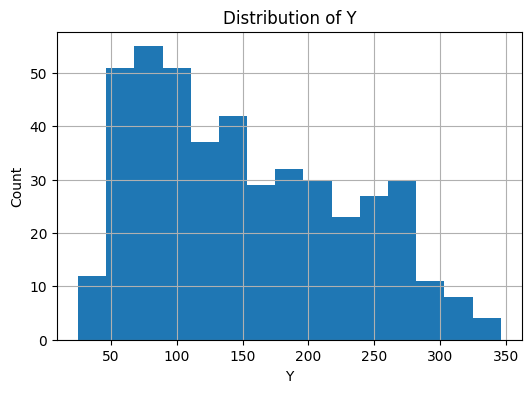

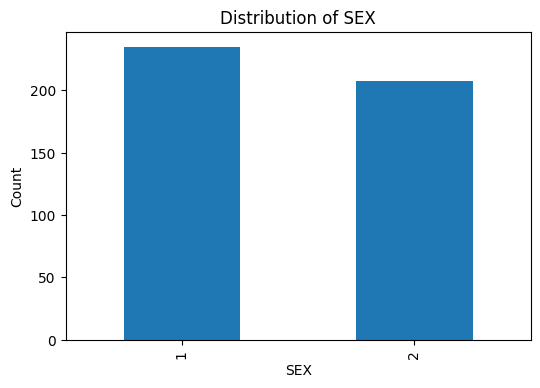

In [11]:
for col in ["AGE", "BMI", "Y"]:
    df[col].hist(bins=15, figsize=(6,4))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

df["SEX"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Distribution of SEX")
plt.xlabel("SEX")
plt.ylabel("Count")
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

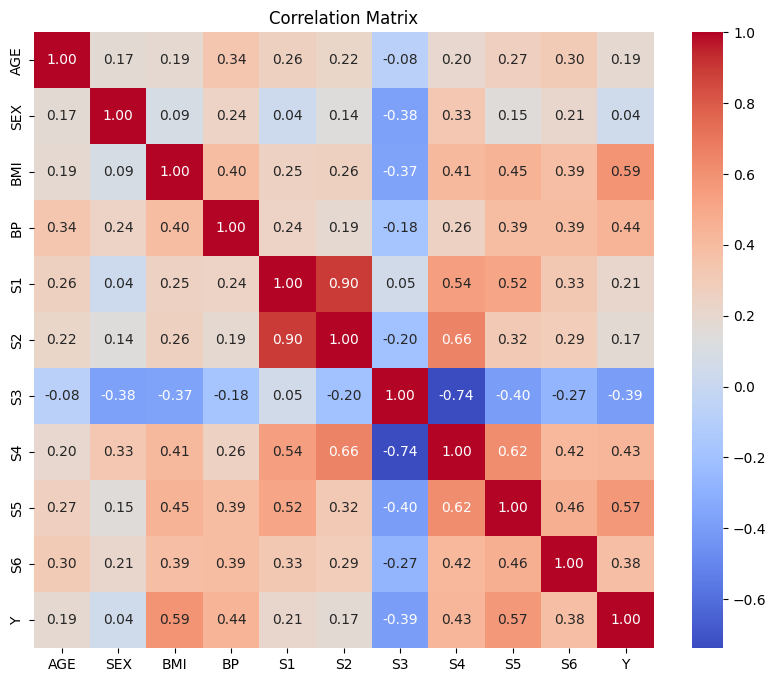

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# считаем корреляции
corr = df.corr()

# смотрим матрицу в виде тепловой карты
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [13]:
corr_with_y = df.corr()["Y"].sort_values(ascending=False)
print(corr_with_y)

Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [14]:
from scipy.stats import ttest_ind

# Данные для мужчин (SEX == 1) и женщин (SEX == 2)
men = df.loc[df['SEX'] == 1, 'Y']
women = df.loc[df['SEX'] == 2, 'Y']

# t-тест для двух независимых выборок
tval, pval = ttest_ind(men, women, equal_var=False)

print(f"T-value = {tval:.2f}")
print(f"P-value = {pval:.4f}")

T-value = -0.90
P-value = 0.3674
